In [1]:
# import json
import sys
import os
import pandas as pd
import re

# parent_dir = os.path.abspath(os.getcwd())
# vendor_dir = os.path.join(parent_dir, 'vendor')
# sys.path.append(vendor_dir)

# from tripadvisorCrawler.items import ReviewItem

from items import *
from dataframe import *
from chronos import *

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

import calendar
from ggplot import *

In [2]:
# data open and auto parse

normalisation_dict = {'unknown':-1}

with open('data/review_items.jl', 'r') as f:
    raw = f.read()


normalised_raw = "\n".join([ re.sub(r'([0-9]{4}-[0-9]{2}-[0-9]{2})T[0-9]{2}:[0-9]{2}:[0-9]{2}', r'\1', line)
for line in raw.splitlines() ])
    
reviews = as_dataframe(normalised_raw)
reviews['timestamp_rating'] = pd.to_datetime(reviews['timestamp_rating'], format="%Y-%m-%d", errors='coerce')
reviews['rating'] = pd.to_numeric(reviews['rating'].replace(normalisation_dict), errors='coerce')
reviews['rating_percentage'] = pd.to_numeric(reviews['rating_percentage'].replace(normalisation_dict), errors='coerce')
with open('data/hotel_items.jl','r') as f:
    raw = f.read()

    
hotels = as_dataframe(raw)

In [3]:
## show case hotels
hotels.head(3)

,batch_id,city,description,item_id,item_title,num_rooms,recommendation_list,site_name,url
0,20170315144644,barna,"The Twelve Hotel, Galway: See 1,574 traveller ...",Hotel_Review-g1068870-d626020-Reviews-The_Twel...,\nThe Twelve Hotel\n,48,"[<div class=""propertyLink"" onclick=""(ta.prwidg...",TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g10688...
1,20170315144644,bushypark,"Glenlo Abbey Hotel, County Galway: See 1,033 t...",Hotel_Review-g1096597-d212831-Reviews-Glenlo_A...,\nGlenlo Abbey Hotel\n,50,"[<div class=""propertyLink"" onclick=""(ta.prwidg...",TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g10965...
2,20170315144644,galway,"Jurys Inn Galway, Galway: See 1,521 traveller ...",Hotel_Review-g186609-d206806-Reviews-Jurys_Inn...,\nJurys Inn Galway\n,130,"[<div class=""propertyLink"" onclick=""(ta.prwidg...",TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...


In [4]:
list(hotels.columns.values)

['batch_id',
 'city',
 'description',
 'item_id',
 'item_title',
 'num_rooms',
 'recommendation_list',
 'site_name',
 'url']

In [5]:
hotels.description[0]

'The Twelve Hotel, Galway: See 1,574 traveller reviews, 409 candid photos, and great deals for The Twelve Hotel, ranked #1 of 1 hotel in Galway and rated 4.5 of 5 at TripAdvisor.'

In [6]:
# number of hotels
hotels.shape[0]

700

In [7]:
# show case reviews
reviews.head(3)

,batch_id,item_id,rating,rating_percentage,review_id,review_text,review_title,site_name,timestamp_rating,url,user_id
0,20170315144644,Hotel_Review-g1068870-d626020-Reviews-The_Twel...,5,1.00,review_465274910,\nThis was my third time to stay at The Twelve...,“Brilliant as always”,TripAdvisor,2017-03-07,https://www.tripadvisor.ie//ShowUserReviews-g1...,F5B23C316CB2454E43F688E4863257B0
1,20170315144644,Hotel_Review-g1068870-d626020-Reviews-The_Twel...,4,0.75,review_465016193,\nThe Twelve was recommended to us as a good p...,“Visit to Galway”,TripAdvisor,2017-03-06,https://www.tripadvisor.ie//ShowUserReviews-g1...,67202B2B0DA2D3F9C15787145D2E0956
2,20170315144644,Hotel_Review-g186609-d214568-Reviews-Galway_Ba...,5,1.00,review_464002623,\nWe returned to the Galway Bay Hotel for Chri...,“Christmas At The Bay”,TripAdvisor,2017-03-02,https://www.tripadvisor.ie//ShowUserReviews-g1...,95A4BEC1DE9B5822816A6F3B92DCEEE8


In [8]:
#summary of rating of dublin hotels
reviews.ix[:,['rating']].describe()

,rating
count,207986.000000
mean,4.152525
std,1.055993
min,-1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
reviews['timestamp_rating'].describe()

count                  204032
unique                   4469
top       2016-04-25 00:00:00
freq                      280
first     2001-11-28 00:00:00
last      2017-03-15 00:00:00
Name: timestamp_rating, dtype: object

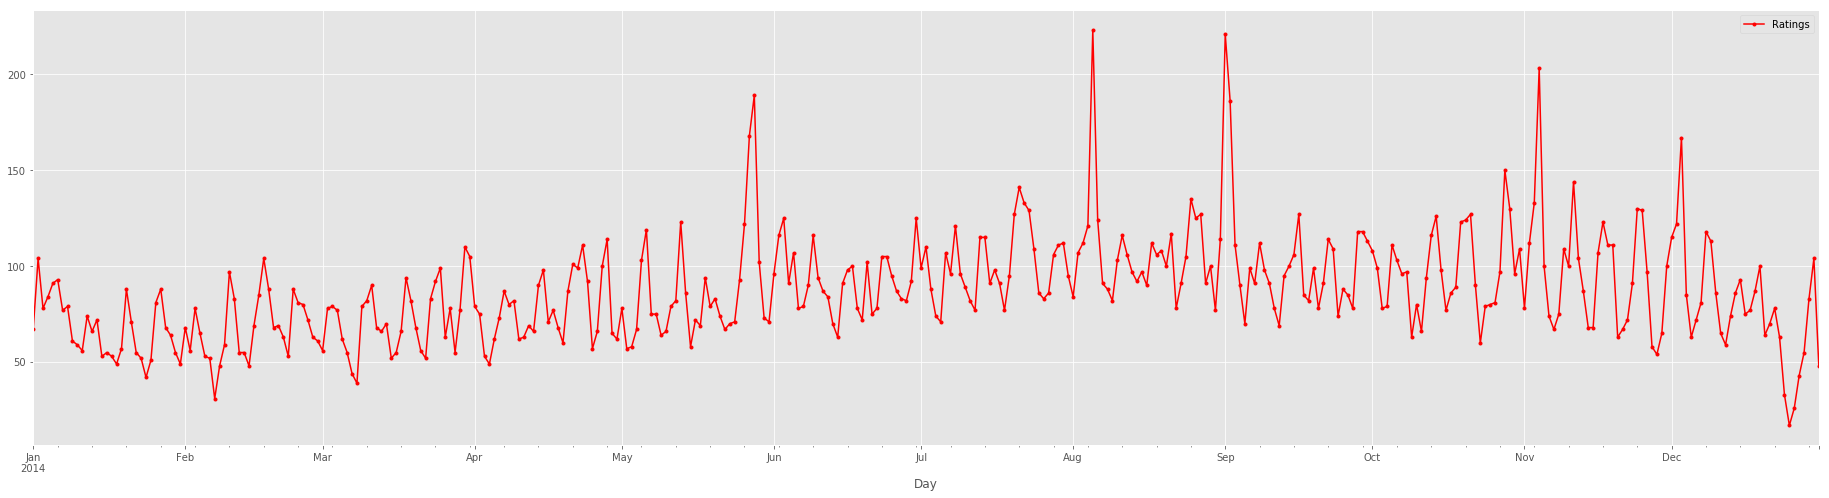

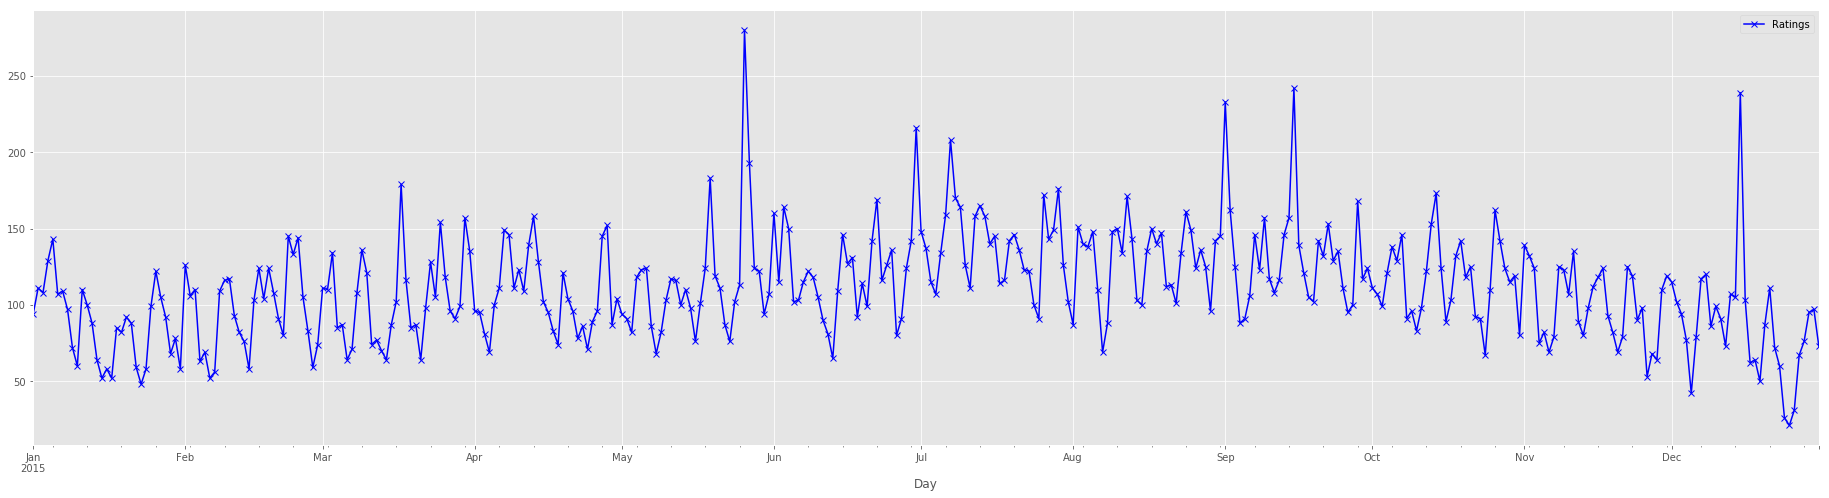

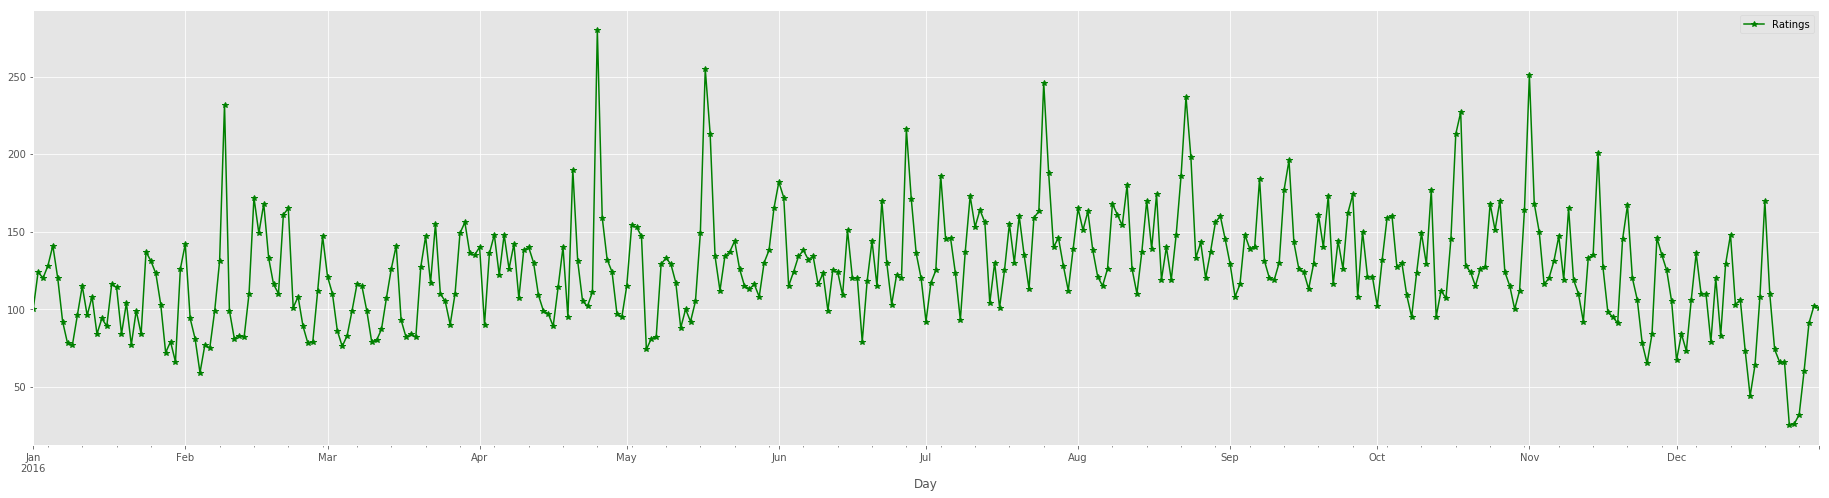

In [10]:
# reviews['rating_date'] = pd.to_datetime(reviews['rating_date'], format='%Y-%m-%dT%H:%M:%S')
# timeseries = reviews.set_index('rating_date')
timeseries = reviews.set_index('timestamp_rating')

ts2014 = timeseries['2014-01-01':'2014-12-31'].ix[:,'rating'].resample('D').count() #changed to D from M
ts2015 = timeseries['2015-01-01':'2015-12-31'].ix[:,'rating'].resample('D').count()
ts2016 = timeseries['2016-01-01':'2016-12-31'].ix[:,'rating'].resample('D').count()

# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# month_factor = calendar.month_abbr[1:13]
day_factor = range(1,366)
year_factor = ['2014','2015','2016']

xlabel = 'Day' # changed to day
ylabel = 'Ratings'


# df4 = pd.DataFrame({xlabel:ts2014.index, ylabel:ts2014.values})
df4 = pd.DataFrame({xlabel:ts2014.index,ylabel:ts2014.values})
df5 = pd.DataFrame({xlabel:ts2015.index,ylabel:ts2015.values})

pad_x3_index = pd.date_range('1/1/2016',periods=365,freq='D') # changed to D
# print(pad_x3_index)
ts2016=ts2016.reindex(pad_x3_index).fillna(0)

df6 = pd.DataFrame({xlabel:ts2016.index,ylabel:ts2016.values})

# new timestamp series
# newts = pd.concat([df1,df2,df3])
# newts.set_index(xlabel,inplace=True)

# http://stackoverflow.com/questions/37596714/compare-multiple-year-data-on-a-single-plot-python
df4.plot(x=xlabel,y=ylabel, figsize=(32,8), color='r', style='.-')
# independent = ax4.twinx()
# ax5 = df5.plot(ax=ax4, color ='b', style='-x')
df5.plot(x=xlabel,y=ylabel,figsize=(32,8), color ='b', style='-x')
df6.plot(x=xlabel,y=ylabel,figsize=(32,8), color = 'g', style='-*')
# finalPlot = df6.plot(ax=ax5, color = 'g', style='-*')
# finalPlot.legend(['2014','2015','2016'],loc='best')
# finalPlot.set_ylabel('Number of Ratings')
# finalPlot.set_xlabel('Days')

# http://blog.yhat.com/posts/aggregating-and-plotting-time-series-in-python.html
# custom all...


# months_f = pd.Series(np.tile(month_factor,3)).astype('category')
# years_f = pd.Series(np.repeat(year_factor,12)).astype('category')


# custom = pd.DataFrame({
#         'Month':months_f,
#         'Ratings':np.array([ts2014.values,ts2015.values,ts2016.values]).flatten(),
#         'Year':years_f
#     })

# ggplot(aes(x = 'Month', y = 'Ratings'), custom) + geom_line()
# ggplot(aes(x='Month',y='Ratings',colour='Year'),custom) + geom_line()


In [11]:
reviewByHotels = reviews.groupby('item_id')

In [12]:
dct = {}
for hotel_url, group in reviewByHotels:
    subset = group.ix[:,['timestamp_rating', 'rating', 'review_text', 'review_title','url']].set_index('timestamp_rating')
    summary = subset.ix[:,'rating'].describe()
    dct[hotel_url] = summary.get_value('count')
    
heap = [(value,key) for key,value in dct.items()]
import heapq
n = 10
topHotels = heapq.nlargest(n, heap)
topHotels = [(key,value) for value,key in topHotels]
print('Top 10 reviewed hotels\n')
print([get_hoteldesc(item[0], hotels)+":"+str(item[1]) for item in topHotels])

#     print(summary, hotel_url)

#     subset['rating_date'] = pd.to_datetime(subset['rating_date'], format='%Y-%m-%dT%H:%M:%S')

    ## Do my own thing: input is subset of rating with timestamp index. output is bin
    ## count for last 2 years of rating on a weekly span.

#     print(subset.resample('AS').count()) # annual start
#     last2years = pd.date_range('2014-01-01','2016-09-01')
#     last2years = pd.period_range('2014','2016')
#     print(last2years)
#     weeklyCount = subset['2014-01-01':'2016-09-01'].resample('AS').count()

#     print(weeklyCount)
#     print(subset["2014-01-01":"2016-09-01"])


Top 10 reviewed hotels

['The Gibson Hotel:4017.0', 'The Croke Park:3882.0', 'Ashling Hotel:3741.0', 'Hotel Riu Plaza The Gresham Dublin:3676.0', 'The Westbury:3476.0', 'Clontarf Castle Hotel:3408.0', 'Academy Plaza Hotel:3394.0', 'Clayton Hotel Cardiff Lane:3357.0', 'The Shelbourne Dublin, A Renaissance Hotel:3291.0', 'The River Lee:3145.0']


In [13]:
# testUrl = 'https://www.tripadvisor.ie/Hotel_Review-g186605-d1765611-Reviews-The_Gibson_Hotel-Dublin_County_Dublin.html'
# testUrl = 'https://www.tripadvisor.ie/Hotel_Review-g186605-d559524-Reviews-The_Croke_Park-Dublin_County_Dublin.html'
testUrl = topHotels[0][0]
des = get_hoteldesc(testUrl, hotels)


print(des)

The Gibson Hotel


In [14]:
testRevs = reviews[reviews.item_id == testUrl].set_index('timestamp_rating')

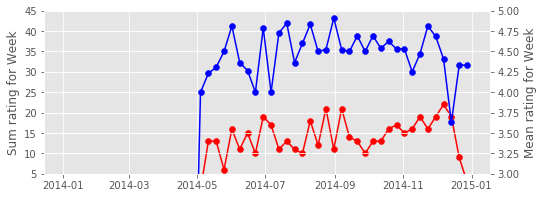

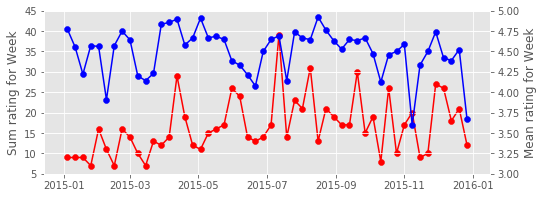

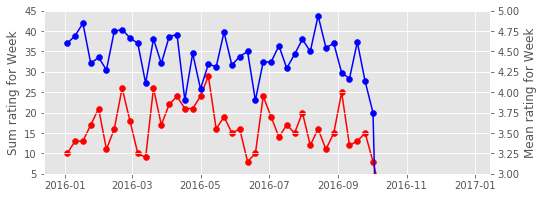

In [15]:

## hotel id, freq, start, end; data=groupedReviews
## divide by start to end, yearly
## depending on freq, get x length (pad)
## resample with freq, pad them each
## get values for each
## plot x,values for each

start = '2014-05'
end = '2016-09'

freq = 'W'


testRevsMean = testRevs.ix[:,'rating'][start:end].resample(freq).mean()#.fillna(0)
testRevsCount = testRevs.ix[:,'rating'][start:end].resample(freq).count()#.fillna(0)

# print(testRevsMean)
# print(testRevsCount)


meanDFs = [group[1] for group in testRevsMean.groupby(testRevsMean.index.year)]
countDFs = [group[1] for group in testRevsCount.groupby(testRevsCount.index.year)]

years = get_yearsfromrange(start,end)

xlabel = 'Weeks' if freq is 'W' else 'Months'
interval = 'Week' if freq is 'W' else 'Month'
        
ylabels = [s+interval for s in ['Mean rating for ', 'Sum rating for ']]

for i in range(len(meanDFs)):
    padded_year_freq = get_paddedyearbyfreq(years[i], freq)
    freq_factor = get_freqfactor(freq)
    meanDFs[i] = meanDFs[i].reindex(padded_year_freq).fillna(0)
    countDFs[i] = countDFs[i].reindex(padded_year_freq).fillna(0)
    
    x1 = countDFs[i].index
    y1 = countDFs[i].values
    x2 = meanDFs[i].index
    y2 = meanDFs[i].values

    fig, ax1 = plt.subplots(figsize=(8, 3))
    ax1.plot(x1,y1,color='r')
    ax1.scatter(x1,y1,color='r')
    ax1.set_ylim(5,45)
    ax1.set_ylabel(ylabels[1])

    ax2 = ax1.twinx()

    ax2.plot(x2,y2, 'b')
    ax2.scatter(x2,y2, color='b')
    ax2.set_ylim(3,5)
    ax2.set_ylabel(ylabels[0])



('Hotel_Review-g186605-d1765611-Reviews-The_Gibson_Hotel-Dublin_County_Dublin', 4017.0)
('Hotel_Review-g186605-d1765611-Reviews-The_Gibson_Hotel-Dublin_County_Dublin', 4017.0)
('Hotel_Review-g186605-d1765611-Reviews-The_Gibson_Hotel-Dublin_County_Dublin', 4017.0)
('Hotel_Review-g186605-d1765611-Reviews-The_Gibson_Hotel-Dublin_County_Dublin', 4017.0)
('Hotel_Review-g186605-d559524-Reviews-The_Croke_Park-Dublin_County_Dublin', 3882.0)
('Hotel_Review-g186605-d559524-Reviews-The_Croke_Park-Dublin_County_Dublin', 3882.0)
('Hotel_Review-g186605-d559524-Reviews-The_Croke_Park-Dublin_County_Dublin', 3882.0)
('Hotel_Review-g186605-d559524-Reviews-The_Croke_Park-Dublin_County_Dublin', 3882.0)
('Hotel_Review-g186605-d212690-Reviews-Ashling_Hotel-Dublin_County_Dublin', 3741.0)
('Hotel_Review-g186605-d212690-Reviews-Ashling_Hotel-Dublin_County_Dublin', 3741.0)
('Hotel_Review-g186605-d212690-Reviews-Ashling_Hotel-Dublin_County_Dublin', 3741.0)
('Hotel_Review-g186605-d212690-Reviews-Ashling_Hotel-Dub

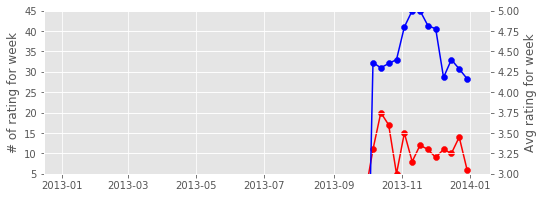

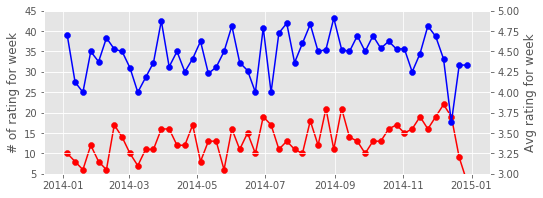

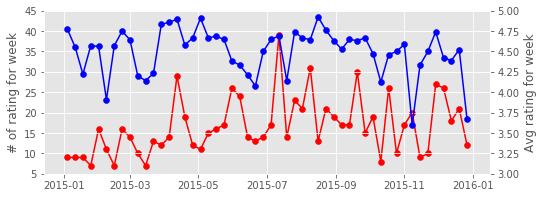

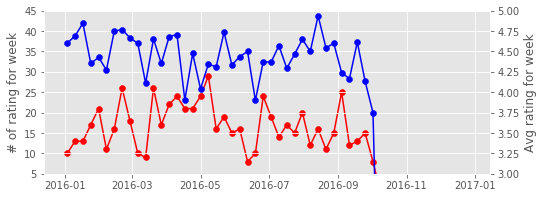

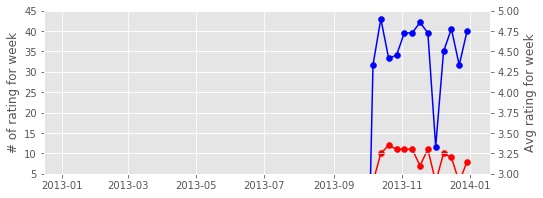

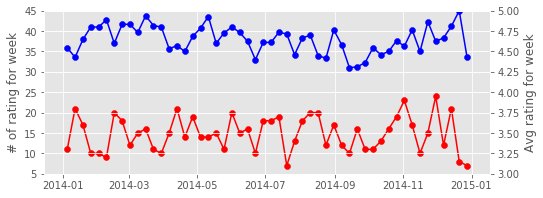

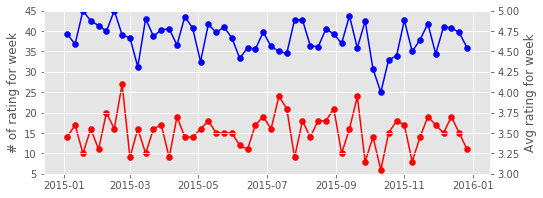

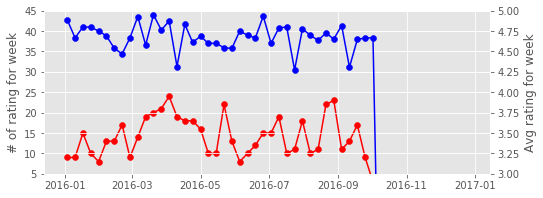

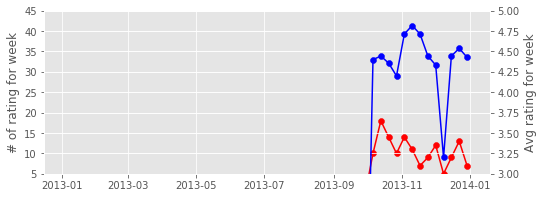

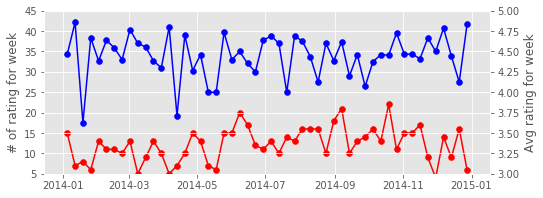

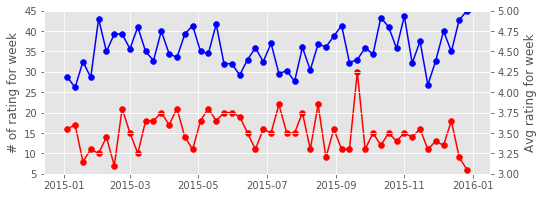

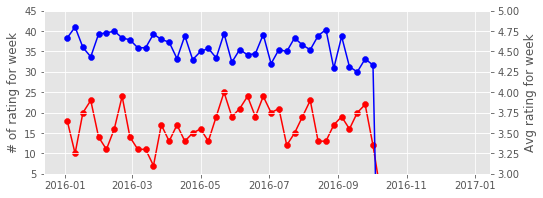

In [16]:
myExp = topHotels[0:3]
for exp in myExp:
    for x1,y1,x2,y2,yls in pltHotelRatingByYears(exp[0], '2013-10-01','2016-09-30', 'W', data=reviews):
        print(exp)
        fig, ax1 = plt.subplots(figsize=(8, 3))
        ax1.plot(x1,y1,color='r')
        ax1.scatter(x1,y1,color='r')
        ax1.set_ylim(5,45)
        ax1.set_ylabel(yls[1])

        ax2 = ax1.twinx()

        ax2.plot(x2,y2, 'b')
        ax2.scatter(x2,y2, color='b')
        ax2.set_ylim(3,5)
        ax2.set_ylabel(yls[0])
        

In [17]:
df5[df5.Ratings == max(df5.Ratings)] #dublin

,Day,Ratings
145,2015-05-26,280


In [18]:
three_years = timeseries['2014-01-01':'2016-12-31']
all_3years = three_years.ix[:,'rating'].resample('W').count()
print(
    all_3years['2015-07-12']
)
review_counts_gibson_3years = three_years.ix[three_years['item_id'] == topHotels[0][0],'rating'].resample('W').count()
print(
    review_counts_gibson_3years[review_counts_gibson_3years == max(review_counts_gibson_3years)]
)

1096
timestamp_rating
2015-07-12    39
Freq: W-SUN, Name: rating, dtype: int64


In [19]:
three_years = timeseries['2014-01-01':'2015-12-31']
all_3years = three_years.ix[:,'rating'].resample('W').count()

review_counts_gibson_3years = three_years.ix[three_years['item_id'] == topHotels[0][0],'rating'].resample('W').mean()
print( "min rated on the week: \n",
    review_counts_gibson_3years[review_counts_gibson_3years == min(review_counts_gibson_3years)]
)


min rated on the week: 
 timestamp_rating
2015-11-08    3.6
Freq: W-SUN, Name: rating, dtype: float64


In [20]:
date_start = '2015-11-08'
date_end = '2015-11-15'


investigation = timeseries[date_start:date_end]
gibson = topHotels[0][0]
textdf = pd.DataFrame(
    {
        'Hotel':investigation['item_id'].values,
        'Text':investigation['review_text'].values
    })

genre_docs = textdf['Text'].values

gibson_docs = textdf.ix[textdf['Hotel'] == gibson ,'Text'].values

import nltk

from sklearn.feature_extraction.text import TfidfVectorizer

genre_vect = TfidfVectorizer(analyzer='word', stop_words='english')
gibson_vect = TfidfVectorizer(analyzer='word', stop_words='english')
genre_tfidf = genre_vect.fit_transform(genre_docs)
gibson_tfidf = gibson_vect.fit_transform(gibson_docs)

genre_dense = genre_tfidf.todense() ; print(genre_dense.shape[0])
gibson_dense = gibson_tfidf.todense() ; print(gibson_dense.shape[0])

genre_tokens = genre_vect.get_feature_names()
genre_scores_flat = [ pair for doc in genre_dense for pair in zip(range(0, len(doc.tolist()[0])), doc.tolist()[0]) if pair[1] > 0 ]   
genre_scores_top20 = sorted(genre_scores_flat, key=lambda t: t[1]*-1)[:20]
genre_top20_dict = {}
for phrase, score in [(genre_tokens[word_id], score) for (word_id, score) in genre_scores_top20]:
    genre_top20_dict[phrase] = score
genre_wc_text = " ".join([phrase for phrase, score in genre_top20_dict.items() for i in range(round(score*100))])


gibson_tokens = gibson_vect.get_feature_names()
gibson_scores_flat = [ pair for doc in gibson_dense for pair in zip(range(0, len(doc.tolist()[0])), doc.tolist()[0]) if pair[1] > 0 ]   
gibson_scores_top20 = sorted(gibson_scores_flat, key=lambda t: t[1]*-1)[:20]
gibson_top20_dict = {}
for phrase, score in [(gibson_tokens[word_id], score) for (word_id, score) in gibson_scores_top20]:
    gibson_top20_dict[phrase] = score
gibson_wc_text = " ".join([phrase for phrase, score in gibson_top20_dict.items() for i in range(round(score*100))])

869
13


In [21]:
import wordcloud as wc

(-0.5, 399.5, 199.5, -0.5)

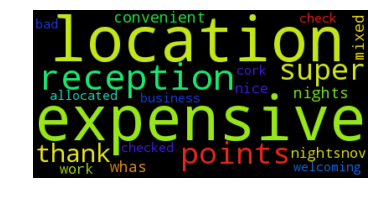

In [22]:


genre_wc = wc.WordCloud().generate(genre_wc_text)
plt.imshow(genre_wc,interpolation='bilinear')
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

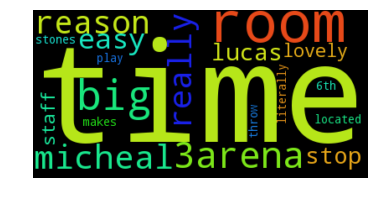

In [23]:
gibson_wc = wc.WordCloud().generate(gibson_wc_text)
plt.imshow(gibson_wc, interpolation='bilinear')
plt.axis('off')

In [24]:

def centroid_score(sentences, threshold):
    wordhash = {}
    c = []
    for i in range(0,size(sentences)):
        for word in sentences[i]:
            if word in wordhash:
                wordhash[word]["tfidf"] = wordhash[word]["tfidf"] + idf[w]
            else:
                wordhash[word] = {}
                wordhash[word]["tfidf"] = idf[w]
            
    for word, value in wordhash.iteritems():
        if wordhash[word]["tfidf"] > threshold:
            wordhash[word]["centroid"] = wordhash[word]["tfidf"]
        else:
            wordhash[word]["centroid"] = 0
        
    for i in range(0, size(sentences)):
        c[i] = 0
        for word in sentences[i]:
            c[i] += wordhash[word]["centroid"]
            
    return c